In [81]:
import pandas as pd
dataframe = pd.read_csv (r'/home/yupaporn/CCA_Project/Dataset_CCA_case_Trainset5257.csv')
dataframe

,Unnamed: 0,Case,Abs Position,Sub Position,Class,Path Full,Path Crop,Views,fold,15AB,...,height,Rleft,Rtop,Rwidth,Rheight,Sub_class_New,tag_AjNit,tag_AjWan,Test150,Spilt
0,0,AB01_15,P3,P31,Abnormal,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,3,MildFattyLiver,...,584.0,0.036832,0.107041,0.712707,0.649402,AB01,NaN,NaN,False,Train
1,1,AB01_15,P1,P1,Abnormal,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,3,MildFattyLiver,...,614.0,0.143898,0.107041,0.595628,0.683267,AB01,NaN,NaN,False,Train
2,2,AB01_15,P2,P2,Abnormal,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,3,MildFattyLiver,...,451.0,0.245009,0.113017,0.497278,0.501992,AB01,NaN,NaN,False,Train
3,3,AB01_15,P4,P42,Abnormal,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,3,MildFattyLiver,...,611.0,0.155235,0.122977,0.718412,0.679283,AB01,NaN,NaN,False,Train
4,4,AB01_15,P4,P41,Abnormal,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,3,MildFattyLiver,...,519.0,0.152057,0.162817,0.608229,0.577689,AB01,NaN,NaN,False,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5252,5252,344,P3,P32,Normal,/media/tohn/HDD/VISION_dataset/USAI/US images ...,/media/tohn/HDD/VISION_dataset/USAI/US images ...,FP-B,4,Normal,...,NaN,NaN,NaN,NaN,NaN,Normal,NaN,NaN,False,Train
5253,5253,344,P4,P42,Normal,/media/tohn/HDD/VISION_dataset/USAI/US images ...,/media/tohn/HDD/VISION_dataset/USAI/US images ...,FP-B,4,Normal,...,NaN,NaN,NaN,NaN,NaN,Normal,NaN,NaN,False,Train
5254,5254,344,P5,P52,Normal,/media/tohn/HDD/VISION_dataset/USAI/US images ...,/media/tohn/HDD/VISION_dataset/USAI/US images ...,FP-C,4,Normal,...,NaN,NaN,NaN,NaN,NaN,Normal,NaN,NaN,False,Train
5255,5255,344,P6,P61,Normal,/media/tohn/HDD/VISION_dataset/USAI/US images ...,/media/tohn/HDD/VISION_dataset/USAI/US images ...,FP-C,4,Normal,...,NaN,NaN,NaN,NaN,NaN,Normal,NaN,NaN,False,Train


# แบ่งข้อมูล

- ขนาด 2 ใน 3 ของข้อมูลเดิม
- Bagging ที่ควรกล่าวถึงคือจำนวนผู้เรียนควรมีจำนวนมากโดยปกติจะอยู่ระหว่าง 100 ถึง 500 ตัวแยกประเภทในเวลาเดียวกันแต่ละคนต้องได้รับความแม่นยำมากกว่า 50%

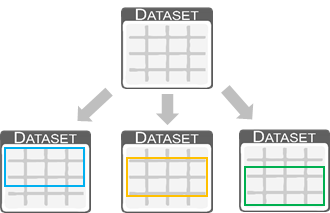

In [82]:
import os
import numpy as np
import pandas as pd
from scipy.special import softmax

In [98]:
def bayes_softmax(tb):
    df_ = tb
    conf_mat = pd.crosstab(df_['Views'],df_['Sub_class_New'],rownames=['5-FP Class'],colnames=['15AB Class'])

    # P(โรค|มุม) = P(มุม|โรค)xP(โรค)

    ## 1) หา P(มุม|โรค)
    view = ['FP-A', 'FP-B', 'FP-C', 'FP-D', 'FP-E']
    Class15AB = ['AB01', 'AB02', 'AB03', 'AB04', 'AB05', 'AB06', 'AB07', 'AB081', 'AB082', 'AB083', 'AB09', 'AB10', 'AB11', 'AB12', 'Normal']

        # Laplacian correction Adding 1 to each case
    p_fp_ = []
    fp_ = []
    AB_ = []
    for i in range(15) :
        fp = [1,1,1,1,1]
        FP = list(conf_mat.iloc[:,i][0:5])
        FP_ = [a +b for a, b in zip(FP, fp)]
        C_all =  sum(FP_)
        view = ['FP-A', 'FP-B', 'FP-C', 'FP-D', 'FP-E']
        for j in range(len(FP_)):
            a = FP_[j]
            p_fp_.append(a)
            AB_.append(Class15AB[i])
            fp_.append(view[j])

    prob_Subclass_Views = np.asarray(p_fp_).reshape((15, 5))
    bb = prob_Subclass_Views.T
    df = pd.DataFrame(bb, columns = ['AB01', 'AB02', 'AB03', 'AB04', 'AB05', 'AB06', 'AB07', 'AB081', 'AB082', 'AB083', 'AB09', 'AB10', 'AB11', 'AB12', 'Normal'])

        # หา prob. มุมในแต่ละโรค

    p_fp_ = []
    fp_ = []
    AB_ = []
    for i in range(15) :
        fp = [1,1,1,1,1]
        FP = list(conf_mat.iloc[:,i][0:5])
        FP_ = [a +b for a, b in zip(FP, fp)]
        C_all =  sum(FP_)
        view = ['FP-A', 'FP-B', 'FP-C', 'FP-D', 'FP-E']
        for j in range(len(FP_)):
            a = FP_[j]/C_all
            p_fp_.append(a)
            AB_.append(Class15AB[i])
            fp_.append(view[j])

    prob_Subclass_Views = np.asarray(p_fp_).reshape((15, 5))
    bb = prob_Subclass_Views.T
    df = pd.DataFrame(bb, columns = ['AB01', 'AB02', 'AB03', 'AB04', 'AB05', 'AB06', 'AB07', 'AB081', 'AB082', 'AB083', 'AB09', 'AB10', 'AB11', 'AB12', 'Normal'])

    ## 2) หา P(โรค)

    count_ = df_[['Sub_class_New','Unnamed: 0']].groupby(['Sub_class_New']).count().reset_index()

    C = count_['Unnamed: 0'].tolist()
    sum_C = count_['Unnamed: 0'].sum()
    prob = []
    for i in C:
        prob.append(i/sum_C)
    count_['prob_15AB'] = prob

    # 3) P(โรค|มุม)

    P_15AB = count_
    prob_15AB = P_15AB['prob_15AB'].tolist()
    prob_15AB = np.asarray(prob_15AB).reshape((15, 1))

    prob_15AB_FP = prob_15AB * prob_Subclass_Views

        ## transpose matrix
    b = prob_15AB_FP.T
    df = pd.DataFrame(b, columns = ['AB01', 'AB02', 'AB03', 'AB04', 'AB05', 'AB06', 'AB07', 'AB081', 'AB082', 'AB083', 'AB09', 'AB10', 'AB11', 'AB12', 'Normal'])

        ## Set normal value = 1
    FP_ = []
    for j in range(5) :
        FP = list(df.iloc[j,:][0:14])
        fp = []
        if j == 4:
            fp = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1,1]
            FP_.append(fp)
        else:
            for i in FP:
                fp.append(i)
            fp.append(1)
            FP_.append(fp)

    FP = np.array(FP_)
    dfs_ = pd.DataFrame(FP, columns = ['AB01', 'AB02', 'AB03', 'AB04', 'AB05', 'AB06', 'AB07', 'AB081', 'AB082', 'AB083', 'AB09', 'AB10', 'AB11', 'AB12', 'Normal'])
#     FP = np.array(dfs_)
    
#         ## matrix softmax
#     FP_ = []
#     for j in range(5) :
#         FP = list(dfs_.iloc[j,:][0:14])
#         fp = []
#         if j == 4:
#             fp = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1,1]
#             FP_.append(fp)
#         else:
#             a = softmax(FP)
#             for i in a:
#                 fp.append(i)
#             fp.append(1)
#             FP_.append(fp)
#     FP = np.array(FP_)

    FP_ = []
    for j in range(5) :
        FP = list(dfs_.iloc[j,:][0:14])
        fp = []
        fp_max = sum(FP)
        if j == 4:
            fp = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1,1]
            FP_.append(fp)
        else:
            for i in FP:
                fp.append(i/fp_max)
            fp.append(1)
            FP_.append(fp)
    FP = np.array(FP_)
    
    return FP

In [99]:
n = int((5257/3)*2) #ขนาด 2 ใน 3 ของข้อมูลเดิม
n #sample size

3504

In [100]:
n_loop = 500
# df1

In [101]:
tb_ = np.array([0] * 75).reshape(5, 15)
for i in range(0,n_loop):
    df = dataframe.sample(n)
    tb = bayes_softmax(df)
    tb_ = tb_+tb

In [102]:
TB = tb_/n_loop
TB

array([[0.18157151, 0.23357572, 0.08755002, 0.17762675, 0.07218428,
        0.11674975, 0.00694466, 0.04822988, 0.04603627, 0.01748897,
        0.00302876, 0.0027714 , 0.00315387, 0.00308817, 1.        ],
       [0.242242  , 0.18717309, 0.04816044, 0.06948892, 0.10813626,
        0.01094153, 0.0897051 , 0.10409268, 0.087108  , 0.03902492,
        0.00609439, 0.00240839, 0.00274068, 0.00268358, 1.        ],
       [0.15743541, 0.11531189, 0.04086689, 0.07390431, 0.00999614,
        0.00264286, 0.0405826 , 0.08669777, 0.07681988, 0.02294029,
        0.17883568, 0.07433254, 0.11683353, 0.00280021, 1.        ],
       [0.00479658, 0.00478478, 0.00453588, 0.01402619, 0.00456877,
        0.00439618, 0.00446361, 0.00463771, 0.00460117, 0.00418111,
        0.00456835, 0.00418015, 0.51496796, 0.42129155, 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 

In [103]:
df_ = pd.DataFrame(TB, columns = [ 'AB01','AB02','AB03', 'AB04', 'AB05', 'AB06', 'AB07', 'AB081', 'AB082', 'AB083', 'AB09', 'AB10', 'AB11', 'AB12', 'Normal'])
df_

,AB01,AB02,AB03,AB04,AB05,AB06,AB07,AB081,AB082,AB083,AB09,AB10,AB11,AB12,Normal
0,0.181572,0.233576,0.087550,0.177627,0.072184,0.116750,0.006945,0.048230,0.046036,0.017489,0.003029,0.002771,0.003154,0.003088,1.0
1,0.242242,0.187173,0.048160,0.069489,0.108136,0.010942,0.089705,0.104093,0.087108,0.039025,0.006094,0.002408,0.002741,0.002684,1.0
2,0.157435,0.115312,0.040867,0.073904,0.009996,0.002643,0.040583,0.086698,0.076820,0.022940,0.178836,0.074333,0.116834,0.002800,1.0
3,0.004797,0.004785,0.004536,0.014026,0.004569,0.004396,0.004464,0.004638,0.004601,0.004181,0.004568,0.004180,0.514968,0.421292,1.0
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [ ]:
#-----------------------------------------------------------------------------------------------------------------------------------------------------------

In [90]:
# P(โรค|มุม) = P(มุม|โรค)xP(โรค)

## 1) หา P(มุม|โรค)
view = ['FP-A', 'FP-B', 'FP-C', 'FP-D', 'FP-E']
Class15AB = ['AB01', 'AB02', 'AB03', 'AB04', 'AB05', 'AB06', 'AB07', 'AB081', 'AB082', 'AB083', 'AB09', 'AB10', 'AB11', 'AB12', 'Normal']

    # Laplacian correction Adding 1 to each case
p_fp_ = []
fp_ = []
AB_ = []
for i in range(15) :
    fp = [1,1,1,1,1]
    FP = list(conf_mat.iloc[:,i][0:5])
    FP_ = [a +b for a, b in zip(FP, fp)]
    C_all =  sum(FP_)
    view = ['FP-A', 'FP-B', 'FP-C', 'FP-D', 'FP-E']
    for j in range(len(FP_)):
        a = FP_[j]
        p_fp_.append(a)
        AB_.append(Class15AB[i])
        fp_.append(view[j])
        
prob_Subclass_Views = np.asarray(p_fp_).reshape((15, 5))
bb = prob_Subclass_Views.T
df = pd.DataFrame(bb, columns = ['AB01', 'AB02', 'AB03', 'AB04', 'AB05', 'AB06', 'AB07', 'AB081', 'AB082', 'AB083', 'AB09', 'AB10', 'AB11', 'AB12', 'Normal'])

    # หา prob. มุมในแต่ละโรค

p_fp_ = []
fp_ = []
AB_ = []
for i in range(15) :
    fp = [1,1,1,1,1]
    FP = list(conf_mat.iloc[:,i][0:5])
    FP_ = [a +b for a, b in zip(FP, fp)]
    C_all =  sum(FP_)
    view = ['FP-A', 'FP-B', 'FP-C', 'FP-D', 'FP-E']
    for j in range(len(FP_)):
        a = FP_[j]/C_all
        p_fp_.append(a)
        AB_.append(Class15AB[i])
        fp_.append(view[j])
        
prob_Subclass_Views = np.asarray(p_fp_).reshape((15, 5))
bb = prob_Subclass_Views.T
df = pd.DataFrame(bb, columns = ['AB01', 'AB02', 'AB03', 'AB04', 'AB05', 'AB06', 'AB07', 'AB081', 'AB082', 'AB083', 'AB09', 'AB10', 'AB11', 'AB12', 'Normal'])

## 2) หา P(โรค)

count_ = df1[['Sub_class_New','Unnamed: 0']].groupby(['Sub_class_New']).count().reset_index()

C = count_['Unnamed: 0'].tolist()
sum_C = count_['Unnamed: 0'].sum()
prob = []
for i in C:
    prob.append(i/sum_C)
count_['prob_15AB'] = prob

# 3) P(โรค|มุม)

P_15AB = count_
prob_15AB = P_15AB['prob_15AB'].tolist()
prob_15AB = np.asarray(prob_15AB).reshape((15, 1))

prob_15AB_FP = prob_15AB * prob_Subclass_Views
    
    ## transpose matrix
b = prob_15AB_FP.T
df = pd.DataFrame(b, columns = ['AB01', 'AB02', 'AB03', 'AB04', 'AB05', 'AB06', 'AB07', 'AB081', 'AB082', 'AB083', 'AB09', 'AB10', 'AB11', 'AB12', 'Normal'])

    ## Set normal value = 1
FP_ = []
for j in range(5) :
    FP = list(df.iloc[j,:][0:14])
    fp = []
    if j == 4:
        fp = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1,1]
        FP_.append(fp)
    else:
        for i in FP:
            fp.append(i)
        fp.append(1)
        FP_.append(fp)

FP = np.array(FP_)
dfs_ = pd.DataFrame(FP, columns = ['AB01', 'AB02', 'AB03', 'AB04', 'AB05', 'AB06', 'AB07', 'AB081', 'AB082', 'AB083', 'AB09', 'AB10', 'AB11', 'AB12', 'Normal'])
FP = np.array(dfs_)

#     ## matrix softmax
# FP_ = []
# for j in range(5) :
#     FP = list(dfs_.iloc[j,:][0:14])
#     fp = []
#     if j == 4:
#         fp = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1,1]
#         FP_.append(fp)
#     else:
#         a = softmax(FP)
#         for i in a:
#             fp.append(i)
#         fp.append(1)
#         FP_.append(fp)
# FP = np.array(FP_)

In [91]:
FP

array([[1.27931034e-02, 2.01034483e-02, 7.20000000e-03, 1.32142857e-02,
        7.04347826e-03, 8.25000000e-03, 1.41176471e-03, 5.40909091e-03,
        1.58333333e-03, 1.63636364e-03, 7.91666667e-04, 6.42857143e-04,
        8.75000000e-04, 8.48484848e-04, 1.00000000e+00],
       [1.91896552e-02, 2.01034483e-02, 6.40000000e-03, 1.40952381e-02,
        8.60869565e-03, 6.87500000e-04, 7.76470588e-03, 6.18181818e-03,
        7.91666667e-03, 1.63636364e-03, 2.37500000e-03, 6.42857143e-04,
        8.75000000e-04, 8.48484848e-04, 1.00000000e+00],
       [1.91896552e-02, 1.09655172e-02, 4.80000000e-03, 7.04761905e-03,
        7.82608696e-04, 6.87500000e-04, 1.41176471e-03, 3.86363636e-03,
        7.91666667e-03, 1.63636364e-03, 1.42500000e-02, 6.42857143e-03,
        7.87500000e-03, 8.48484848e-04, 1.00000000e+00],
       [9.13793103e-04, 9.13793103e-04, 8.00000000e-04, 1.76190476e-03,
        7.82608696e-04, 6.87500000e-04, 7.05882353e-04, 7.72727273e-04,
        7.91666667e-04, 5.45454545e-0

In [15]:
(dfs_+dfs_+dfs_+dfs_+dfs_)/5

,AB01,AB02,AB03,AB04,AB05,AB06,AB07,AB081,AB082,AB083,AB09,AB10,AB11,AB12,Normal
0,0.016475,0.017208,0.00525,0.012917,0.004696,0.010111,0.00075,0.004074,0.004966,0.001750,0.000762,0.000375,0.000907,0.000828,1.0
1,0.020136,0.019019,0.00600,0.007750,0.010174,0.000722,0.00900,0.009778,0.010759,0.002917,0.001524,0.000375,0.000907,0.000828,1.0
2,0.015559,0.009962,0.00225,0.007750,0.001565,0.000722,0.00375,0.006519,0.006621,0.001167,0.012190,0.001500,0.010889,0.000828,1.0
3,0.000915,0.000906,0.00075,0.001722,0.000783,0.000722,0.00075,0.000815,0.000828,0.000583,0.000762,0.000375,0.035389,0.020690,1.0
4,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
